# Lab 02: Decision Tree
Group Members:
| **Student Name** | **Student ID** |
|:------------:|:----------:|
| Nguyễn Tấn Duy Anh | 22120015 |
| Bùi Hồng Phúc | 22120270 |
| Nguyễn Lê Anh Phúc | 22120276 |
| Hồ Minh Quang | 22120295 |

## Dataset 2
### Import libary

In [106]:
import time
import numpy as np  # Random samples generator
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### import dataset.

In [107]:
# import dataset
from ucimlrepo import fetch_ucirepo
wine_quality = fetch_ucirepo(id = 186)

In [108]:
# Get the white color only
raw_data = wine_quality.data.original
raw_data = raw_data[raw_data['color'] == 'white'].reset_index(drop = 1)

features = raw_data[wine_quality.data.features.keys()]
targets = raw_data[wine_quality.data.targets.keys()]
labels = np.unique(targets)

In [109]:
raw_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [110]:
# Variable information
wine_quality.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


In [111]:
# Check for missing values
for col in raw_data.keys():
    print(col + f"\t{raw_data[col].isna().sum()}")

fixed_acidity	0
volatile_acidity	0
citric_acid	0
residual_sugar	0
chlorides	0
free_sulfur_dioxide	0
total_sulfur_dioxide	0
density	0
pH	0
sulphates	0
alcohol	0
quality	0
color	0


### Preparation
We only test on white wine samples only, so we need to remove the color column first.

In [112]:
raw_data = raw_data.drop(columns = 'color')

Instead of rating wine quality from 0 to 10, we will divide the group into three categories: Low (0 - 4), Standard (5 and 6) and High (7 - 10).

In [113]:
new_ratings = pd.DataFrame({'quality': ['Standard'] * len(raw_data)})
new_ratings.loc[raw_data['quality'] < 5] = 'Low'
new_ratings.loc[raw_data['quality'] > 6] = 'High'
raw_data['quality'] = new_ratings
targets = raw_data[wine_quality.data.targets.keys()]
labels = np.unique(targets)

raw_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Standard
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Standard
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Standard
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Standard
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Standard
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Standard
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Standard
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,High


In [114]:
# Get subsets
proportions = [0.4, 0.6, 0.8, 0.9]
datasets = {}



for train_prop in proportions:
    feature_train, feature_test, label_train, label_test = train_test_split(features, targets, train_size = train_prop, test_size = 1 - train_prop,
                                                                            stratify = targets, random_state = 42)
    datasets[f'train_{int((train_prop)*100)}/test_{int((1 - train_prop)*100 + 0.1)}'] = (feature_train, feature_test, label_train, label_test)

Data Visualization

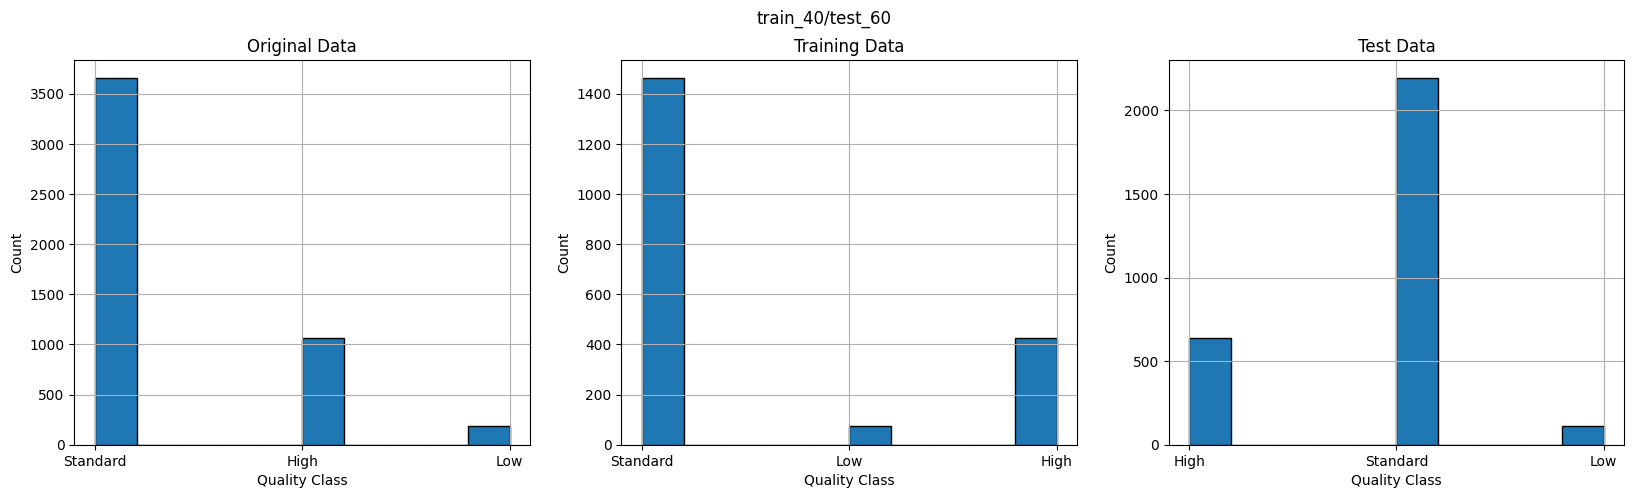

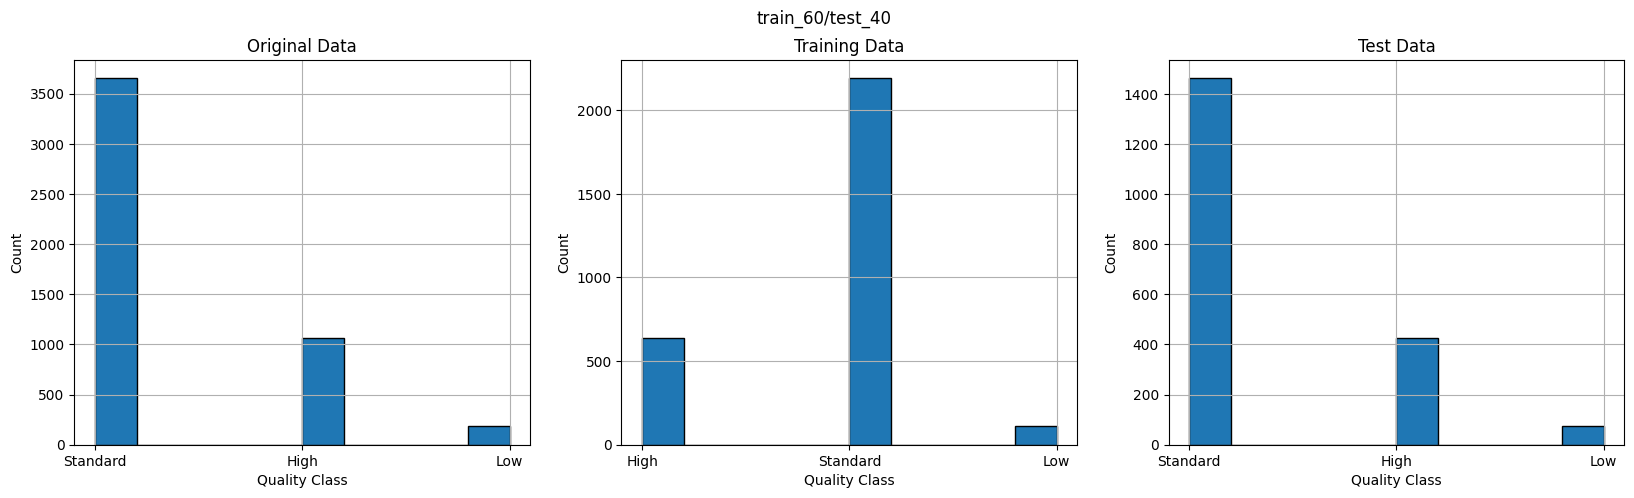

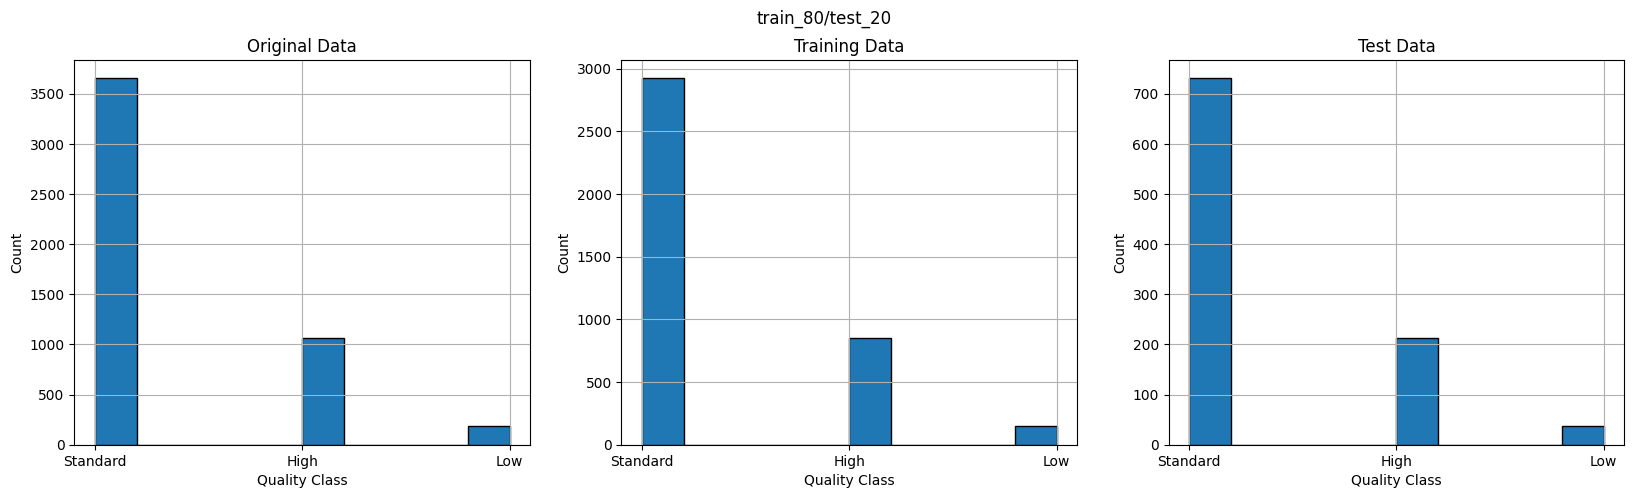

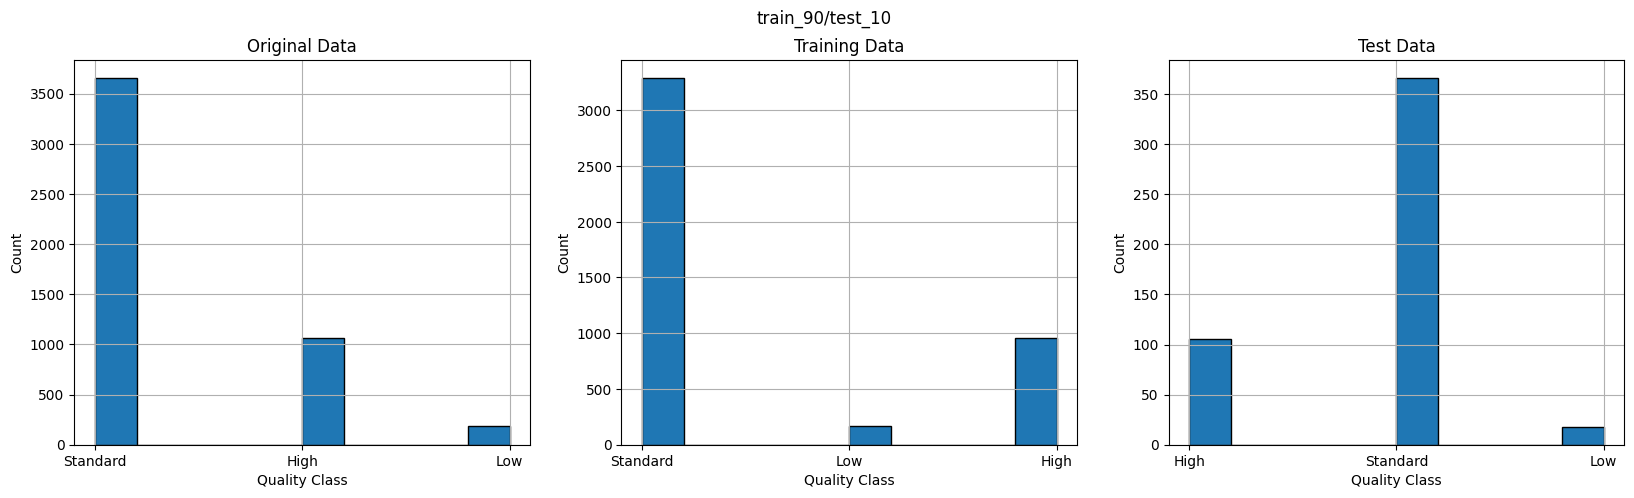

In [115]:
list_proportion = []
for key, (feature_train, feature_test, label_train, label_test) in datasets.items():
    list_proportion.append(key)
    plt.figure(figsize = (20, 5))
    plt.suptitle(f'{key}')

    plt.subplot(1,3,1)
    raw_data['quality'].hist(edgecolor = 'black')
    plt.title('Original Data')
    plt.xlabel('Quality Class')
    plt.ylabel('Count')

    plt.subplot(1,3,2)
    label_train['quality'].hist(edgecolor = 'black')
    plt.title(f'Training Data')
    plt.xlabel("Quality Class")
    plt.ylabel("Count")

    plt.subplot(1,3,3)
    label_test['quality'].hist(edgecolor = 'black')
    plt.title(f'Test Data')
    plt.xlabel('Quality Class')
    plt.ylabel("Count")

    plt.show()

### Decision  Tree Construction

40/60 Proportion

In [116]:
list_proportion[0]

'train_40/test_60'

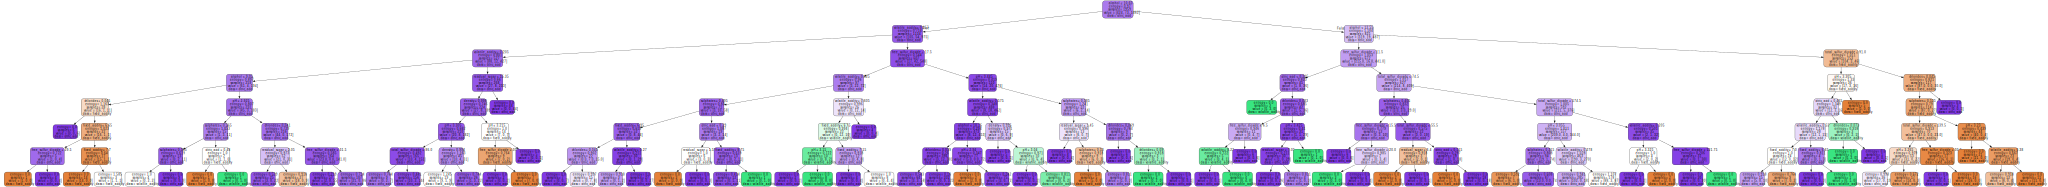

In [117]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[0]]

# Tạo và huấn luyện mô hình
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=7)
clf_1 = clf_1.fit(feature_train, label_train)


dot_data = export_graphviz(
    clf_1,
    feature_names=features.columns,
    class_names=features.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# Tạo và hiển thị đồ thị
graph = graphviz.Source(dot_data)
display(graph)

### 60/40 Proportion

In [118]:
list_proportion[1]

'train_60/test_40'

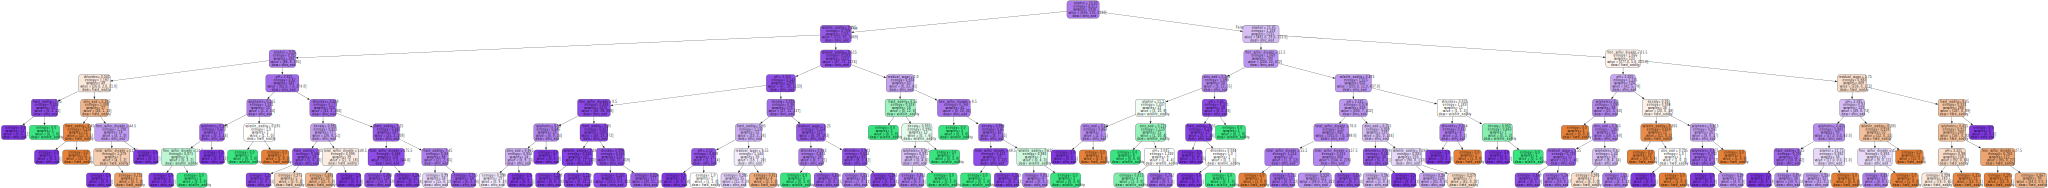

In [119]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[1]]

clf_2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7 )
clf_2 = clf_2.fit(feature_train, label_train)

dot_data = export_graphviz(clf_2, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

### 80/20 Proportion

In [120]:
list_proportion[2]

'train_80/test_20'

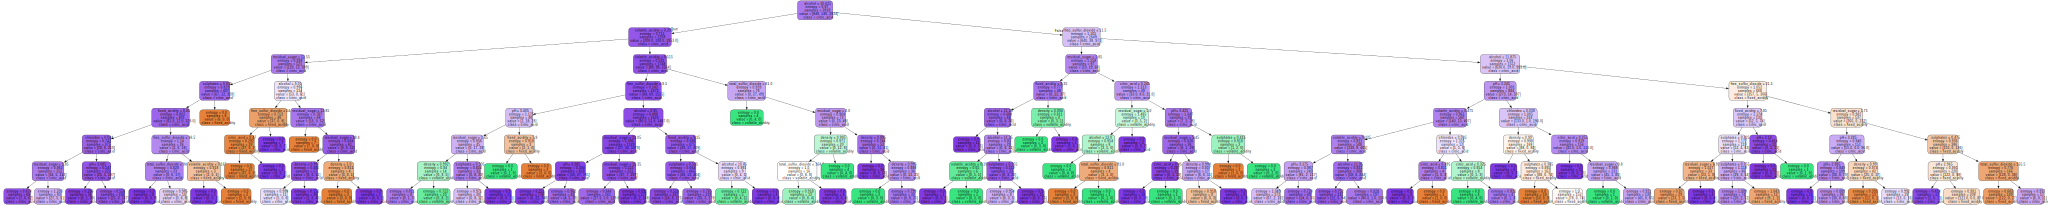

In [121]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[2]]

clf_3 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7 )
clf_3 = clf_3.fit(feature_train, label_train)

dot_data = export_graphviz(clf_3, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

### 90/10 Proportion

In [122]:
list_proportion[3]

'train_90/test_10'

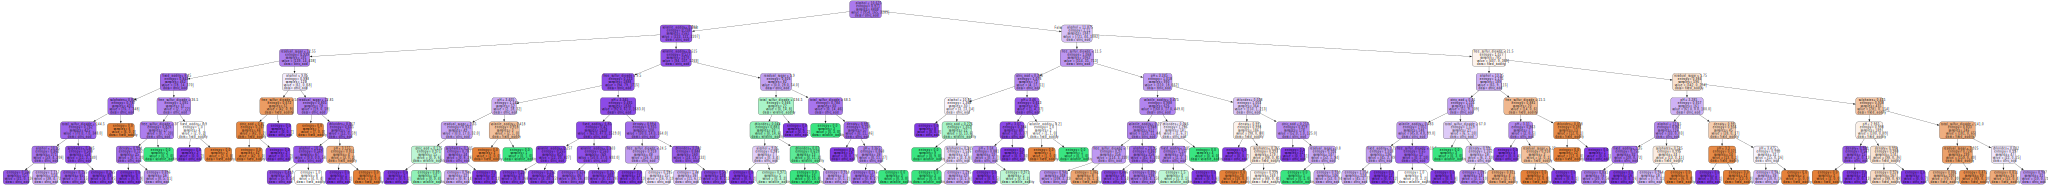

In [123]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[3]]

clf_4 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7 )
clf_4 = clf_4.fit(feature_train, label_train)

dot_data = export_graphviz(clf_4, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

### Evaluation

              precision    recall  f1-score   support

        High       0.47      0.38      0.42       636
         Low       0.30      0.15      0.20       110
    Standard       0.80      0.86      0.83      2193

    accuracy                           0.73      2939
   macro avg       0.52      0.46      0.48      2939
weighted avg       0.71      0.73      0.72      2939



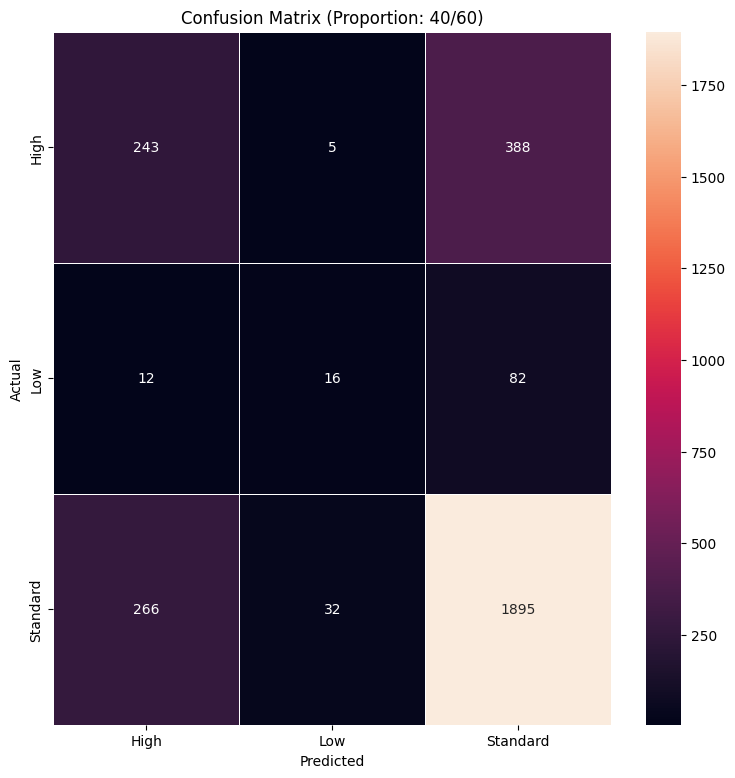

In [124]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[0]]

pred_1 = clf_1.predict(feature_test)
print(classification_report(label_test, pred_1))
cfm_1 = confusion_matrix(label_test, pred_1)

plt.figure(figsize=(9, 9))
sns.heatmap(cfm_1, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = ['High', 'Low', 'Standard'], yticklabels = ['High', 'Low', 'Standard'])
plt.title('Confusion Matrix (Proportion: 40/60)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

        High       0.58      0.43      0.50       424
         Low       0.40      0.11      0.17        73
    Standard       0.82      0.91      0.86      1463

    accuracy                           0.78      1960
   macro avg       0.60      0.48      0.51      1960
weighted avg       0.75      0.78      0.76      1960



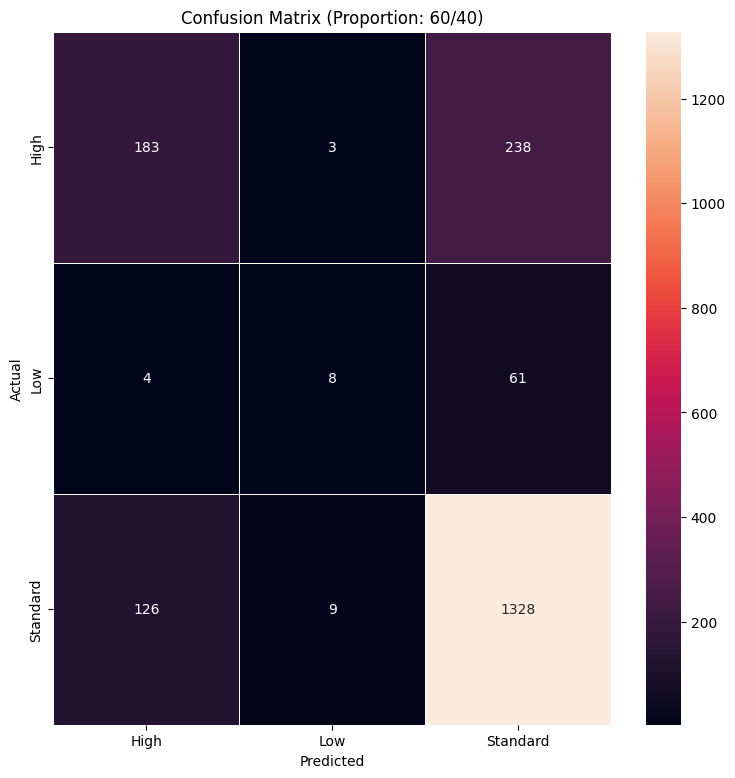

In [125]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[1]]

pred_2 = clf_2.predict(feature_test)
print(classification_report(label_test, pred_2))
cfm_2 = confusion_matrix(label_test, pred_2)

plt.figure(figsize=(9, 9))
sns.heatmap(cfm_2, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = ['High', 'Low', 'Standard'], yticklabels = ['High', 'Low', 'Standard'])
plt.title('Confusion Matrix (Proportion: 60/40)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

        High       0.63      0.46      0.53       212
         Low       0.47      0.19      0.27        37
    Standard       0.82      0.91      0.86       731

    accuracy                           0.79       980
   macro avg       0.64      0.52      0.55       980
weighted avg       0.77      0.79      0.77       980



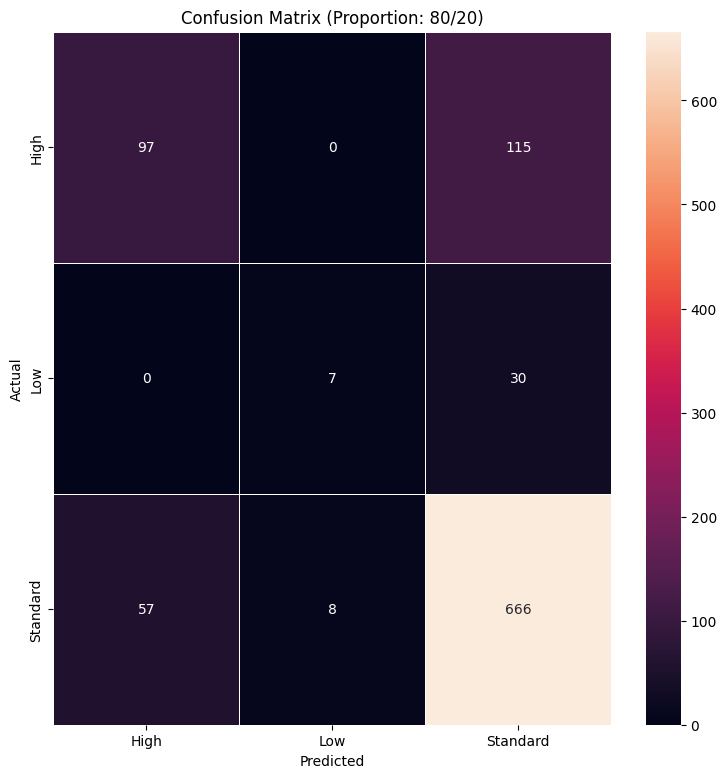

In [126]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[2]]

pred_3 = clf_3.predict(feature_test)
print(classification_report(label_test, pred_3))
cfm_3 = confusion_matrix(label_test, pred_3)

plt.figure(figsize=(9, 9))
sns.heatmap(cfm_3, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = ['High', 'Low', 'Standard'], yticklabels = ['High', 'Low', 'Standard'])
plt.title('Confusion Matrix (Proportion: 80/20)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

        High       0.63      0.42      0.50       106
         Low       0.55      0.33      0.41        18
    Standard       0.82      0.92      0.87       366

    accuracy                           0.79       490
   macro avg       0.67      0.56      0.59       490
weighted avg       0.77      0.79      0.77       490



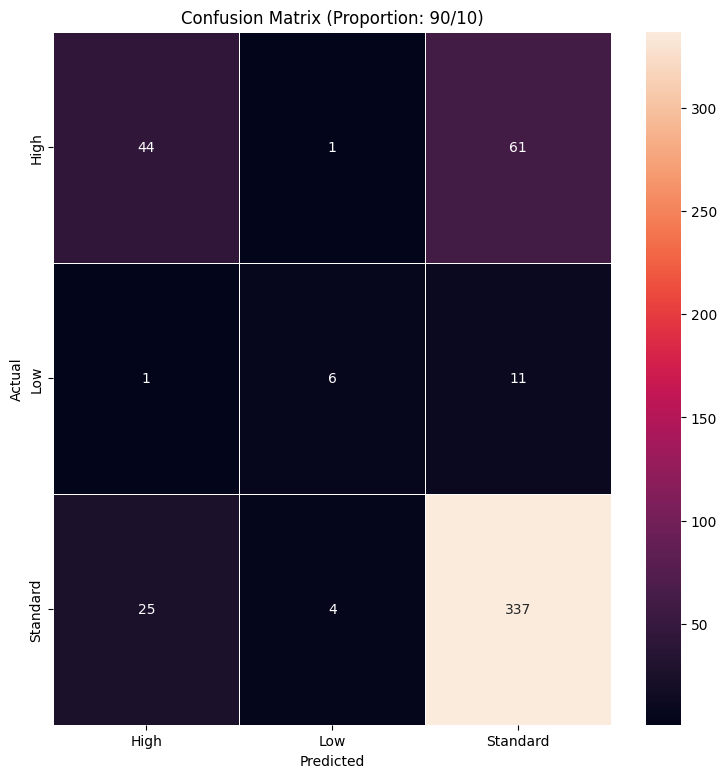

In [127]:
feature_train, feature_test, label_train, label_test = datasets[list_proportion[3]]

pred_4 = clf_4.predict(feature_test)
print(classification_report(label_test, pred_4, zero_division=1))
cfm_4 = confusion_matrix(label_test, pred_4)

plt.figure(figsize=(9, 9))
sns.heatmap(cfm_4, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = ['High', 'Low', 'Standard'], yticklabels = ['High', 'Low', 'Standard'])
plt.title('Confusion Matrix (Proportion: 90/10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Depth and Accuracy Score

In [128]:
# Depth List
max_depth = [None]
max_depth.extend(list(range(2, 8)))
clf_models = []
fit_time = []
accuracy = []

In [129]:
for depth in max_depth:
    feature_train, feature_test, label_train, label_test = train_test_split(features, targets, train_size = 0.8, stratify = targets,
                                                                            random_state = np.uint64(np.random.rand() * 1024))
    clf_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    model_fit_time_start = time.time()
    clf_model = clf_model.fit(feature_train, label_train)
    model_fit_time = time.time() - model_fit_time_start
    clf_models.append(clf_model)
    fit_time.append(model_fit_time)
    pred = clf_model.predict(feature_test)
    accuracy.append(accuracy_score(label_test, pred))

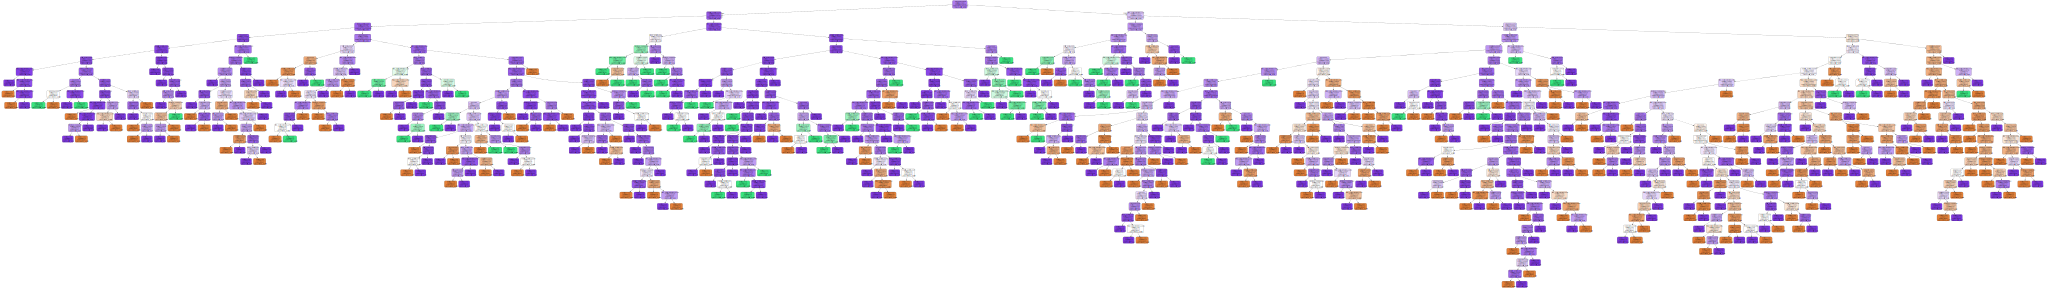

In [130]:
# No Depth Limit
dot_data = export_graphviz(clf_models[0], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

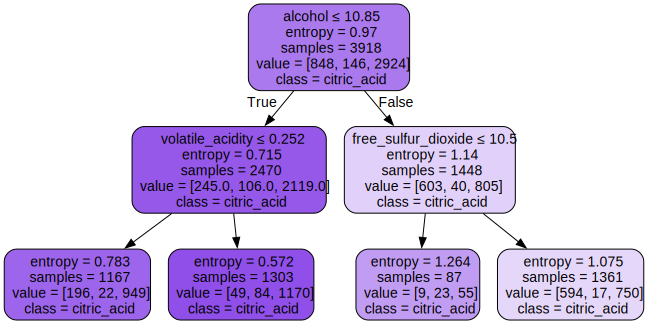

In [131]:
# Depth Limit = 2
dot_data = export_graphviz(clf_models[1], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

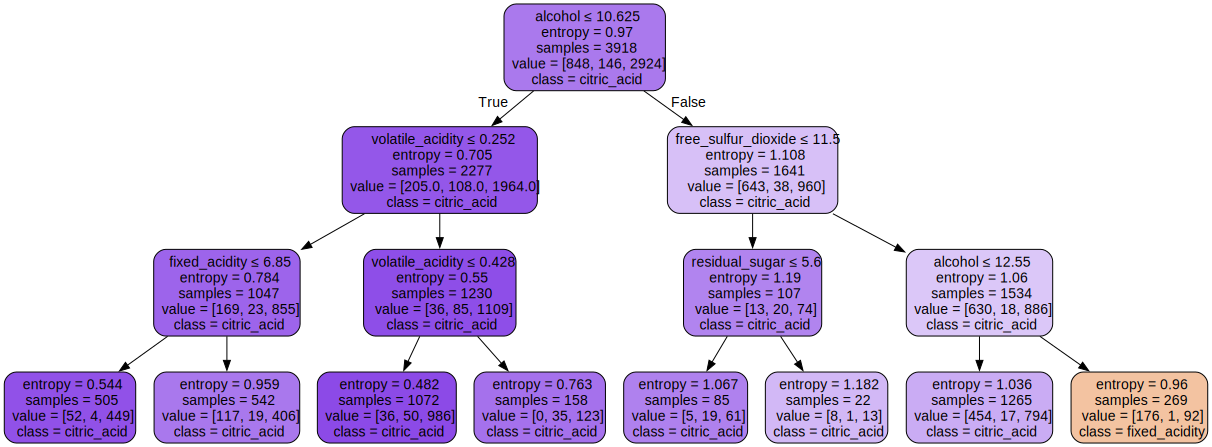

In [132]:
# Depth Limit = 3
dot_data = export_graphviz(clf_models[2], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

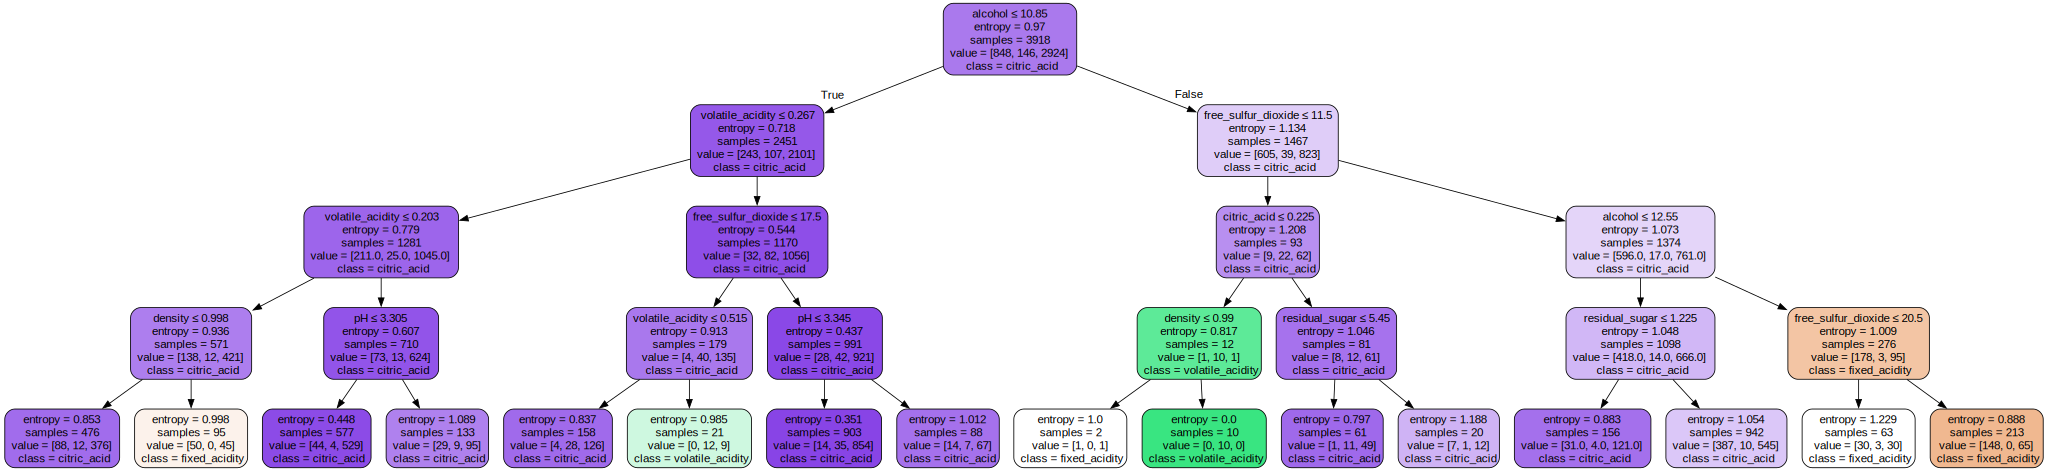

In [133]:
# Depth Limit = 4
dot_data = export_graphviz(clf_models[3], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

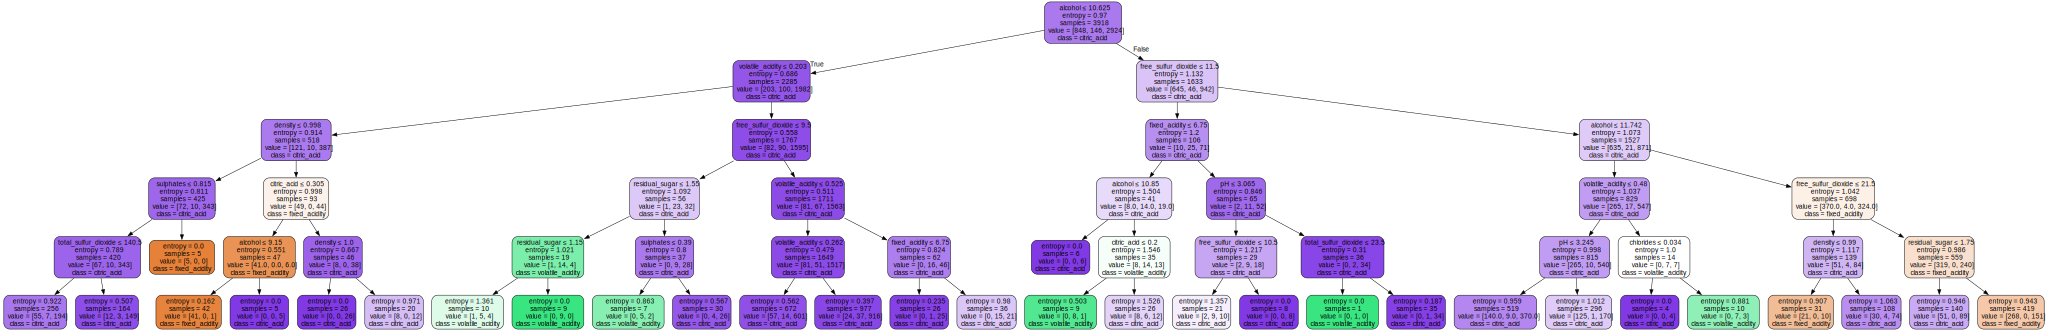

In [134]:
# Depth Limit = 5
dot_data = export_graphviz(clf_models[4], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

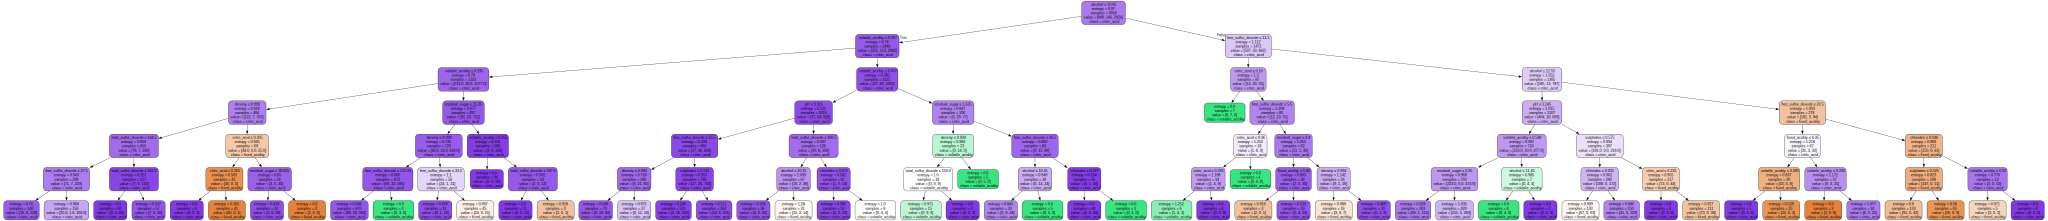

In [135]:
# Depth Limit = 6
dot_data = export_graphviz(clf_models[5], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

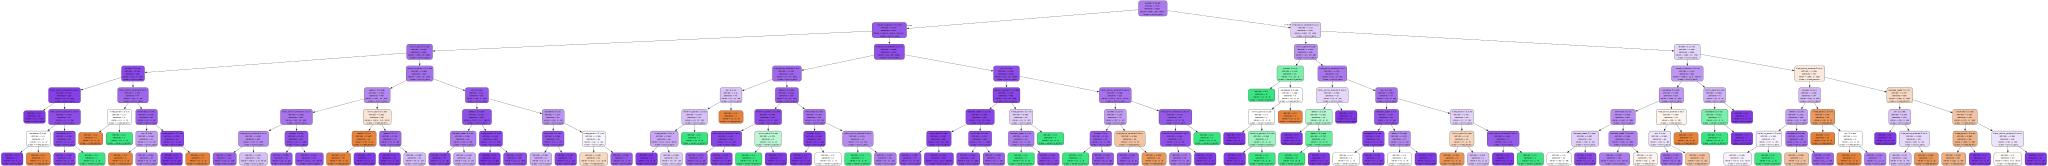

In [136]:
# Depth Limit = 7
dot_data = export_graphviz(clf_models[6], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

### Accuracy Table

In [137]:
max_depth[0] = 'None'
accuracy_df = pd.DataFrame({
    'Max Depth': max_depth,
    'Fit Time': fit_time,
    'Accuracy': accuracy
})
accuracy_df[['Max Depth', 'Accuracy']].set_index('Max Depth').T

Max Depth,None,2,3,4,5,6,7
Accuracy,0.777551,0.745918,0.763265,0.759184,0.776531,0.769388,0.766327


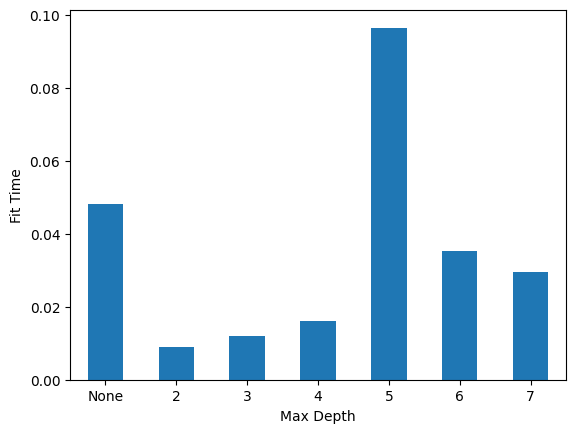

In [138]:
accuracy_df[['Max Depth', 'Fit Time']].plot(x = 'Max Depth', ylabel = 'Fit Time', kind = 'bar', legend = False, rot = 0)
plt.show()